In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Loading the dataset
data = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")

In [10]:
# Select quantitative columns
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns

## What the below snippit of code does:
This code computes summary statistics for the columns specified in quantitative_columns of the DataFrame data. It calculates statistics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numerical column in the DataFrame.

The describe() function provides a quick overview of the distribution of numerical variables in the dataset. The resulting summary statistics are then printed to the console.

In [11]:
# Compute summary statistics
summary_statistics = data[quantitative_columns].describe()
print("Summary Statistics:")
print(summary_statistics)


Summary Statistics:
       UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM         YEAR     YEAR_NUM  \
count    1176.0         1176.0     1176.000000  1176.000000  1176.000000   
mean        2.0            5.0        5.169719  1996.214286    21.500000   
std         0.0            0.0        0.051632    14.948365    12.126075   
min         2.0            5.0        5.112000  1950.000000     1.000000   
25%         2.0            5.0        5.123750  1987.000000    11.000000   
50%         2.0            5.0        5.142500  1997.500000    21.500000   
75%         2.0            5.0        5.223250  2008.000000    32.000000   
max         2.0            5.0        5.244000  2018.000000    42.000000   

           AGE_NUM     ESTIMATE  
count  1176.000000  1012.000000  
mean      3.307143    14.309585  
std       1.067134    11.471759  
min       2.000000     1.200000  
25%       2.000000     5.400000  
50%       3.000000    10.850000  
75%       4.000000    20.725000  
max       5.200000    6

## What this snippit of code does:

This code calculates the Z-scores for each quantitative column in a DataFrame, allowing for standardization and comparison of values across different distributions.

NaN values occur when there is no standard deviation, such as when all values in a column are the same. Negative Z-scores indicate that a value is below the mean of the distribution.

In [12]:

quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Compute Z-scores for each quantitative column
z_scores = pd.DataFrame()
for column in quantitative_columns:
    z_scores[column + '_zscore'] = (data[column] - data[column].mean()) / data[column].std()

# Print the Z-scores
print("Z-scores:")
print(z_scores)


Z-scores:
      UNIT_NUM_zscore  STUB_NAME_NUM_zscore  STUB_LABEL_NUM_zscore  \
0                 NaN                   NaN              -1.117882   
1                 NaN                   NaN              -1.117882   
2                 NaN                   NaN              -1.117882   
3                 NaN                   NaN              -1.117882   
4                 NaN                   NaN              -1.117882   
...               ...                   ...                    ...   
1171              NaN                   NaN               1.438662   
1172              NaN                   NaN               1.438662   
1173              NaN                   NaN               1.438662   
1174              NaN                   NaN               1.438662   
1175              NaN                   NaN               1.438662   

      YEAR_zscore  YEAR_NUM_zscore  AGE_NUM_zscore  ESTIMATE_zscore  
0       -3.091595        -1.690572       -1.224910        -0.672049  
1       -

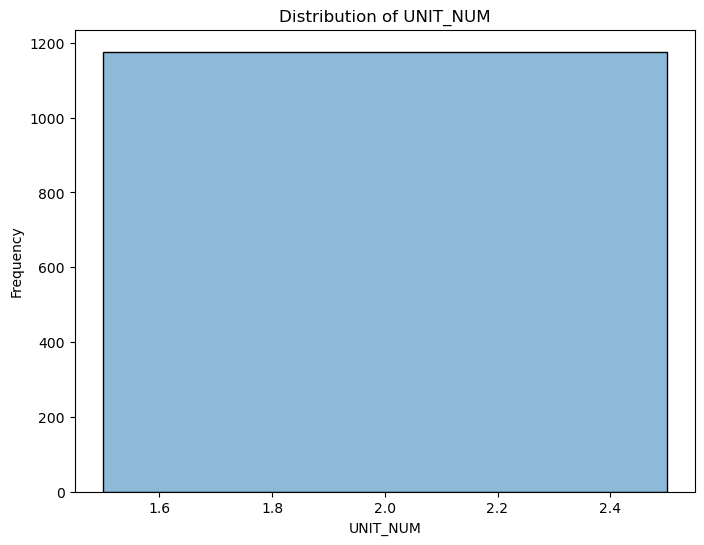

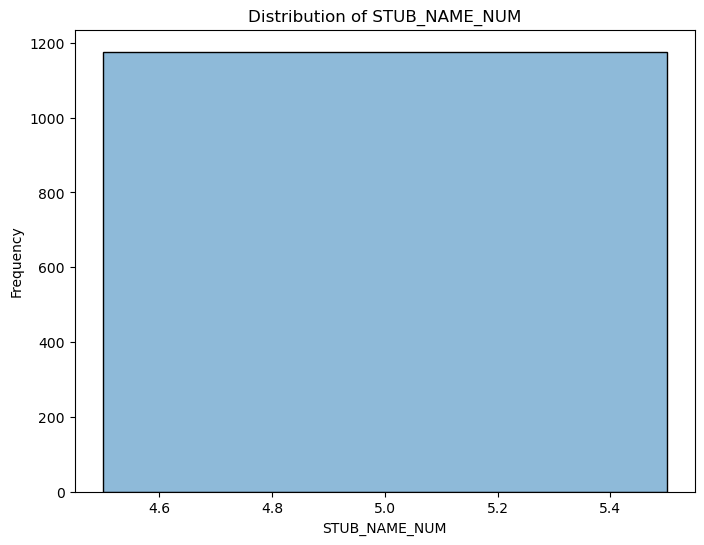

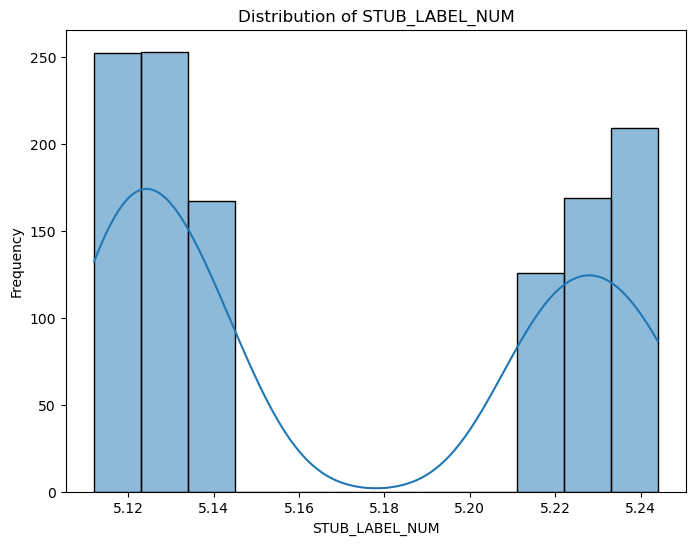

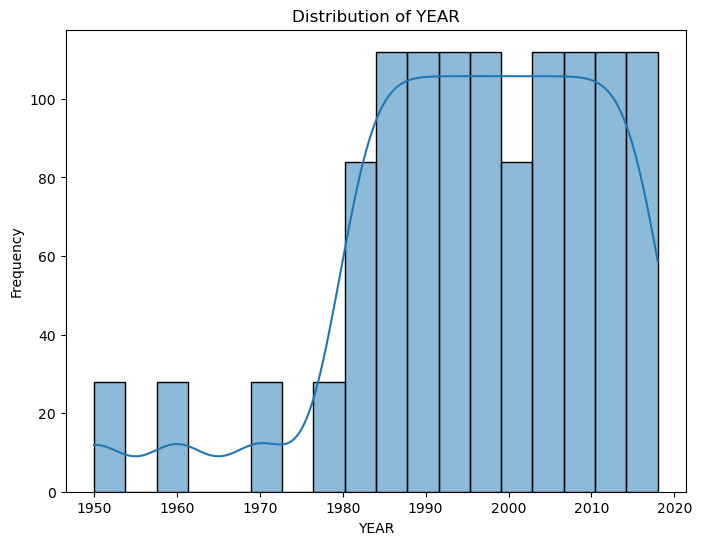

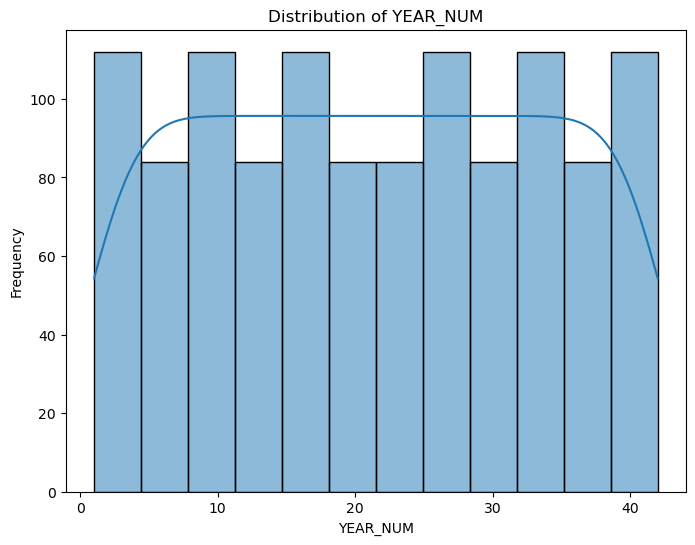

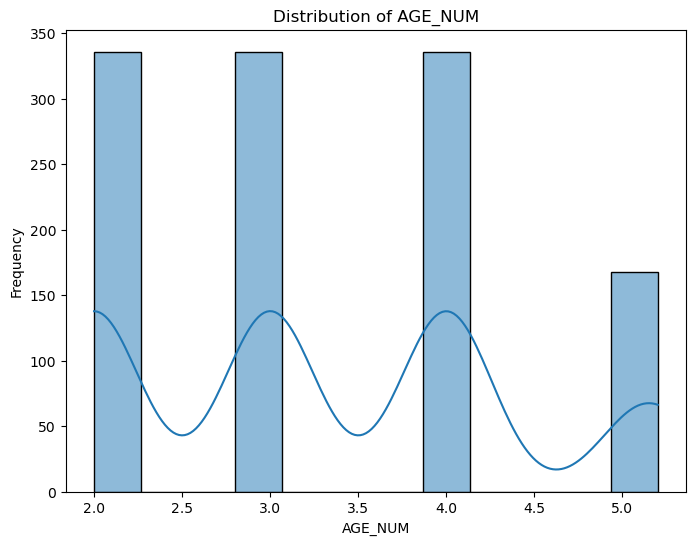

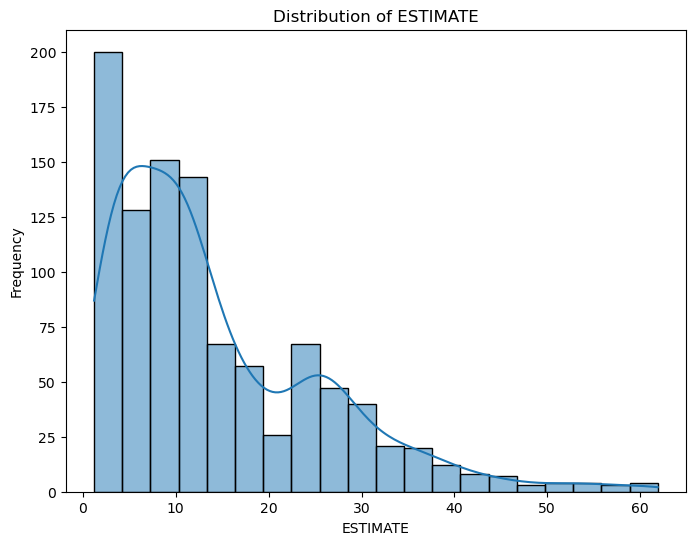

In [13]:
# Visualize distributions
for column in quantitative_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## What this code snippit does:

This code uses he z-scores calculated above for each value in the quantitative columns of the dataset. Then, it identifies outliers by selecting rows where any of the z-scores are greater than 3. Finally, it prints out the rows containing outliers.

In [15]:
# Identify outliers using z-score
outliers = data[(z_scores > 3).any(axis=1)]

print("Outliers:")
print(outliers)

Outliers:
                    INDICATOR                                           UNIT  \
0     Death rates for suicide  Deaths per 100,000 resident population, crude   
42    Death rates for suicide  Deaths per 100,000 resident population, crude   
84    Death rates for suicide  Deaths per 100,000 resident population, crude   
126   Death rates for suicide  Deaths per 100,000 resident population, crude   
168   Death rates for suicide  Deaths per 100,000 resident population, crude   
169   Death rates for suicide  Deaths per 100,000 resident population, crude   
174   Death rates for suicide  Deaths per 100,000 resident population, crude   
175   Death rates for suicide  Deaths per 100,000 resident population, crude   
176   Death rates for suicide  Deaths per 100,000 resident population, crude   
177   Death rates for suicide  Deaths per 100,000 resident population, crude   
178   Death rates for suicide  Deaths per 100,000 resident population, crude   
179   Death rates for suicide 